

---
#Dimensionality Reduction Using Feature Extraction
---




##**Reducing Features Using Principal Components**
---
**To Learn PCA** :

https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

https://www.kdnuggets.com/2020/05/dimensionality-reduction-principal-component-analysis.html

**Problem**


Given a set of features, you want to reduce the number of features while retaining the variance in the data.


**Solution**


Use principal component analysis with scikit’s PCA:





In [ ]:

# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Load the data
digits = datasets.load_digits()

# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])



Original number of features: 64
Reduced number of features: 54




[PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

##Reducing Features When Data Is Linearly Inseparable

**Problem**

You suspect you have linearly inseparable data and want to reduce the dimensions.

**Solution**

Use an extension of principal component analysis that uses `kernels` to allow for non-linear dimensionality reduction:

In [ ]:
# Load libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# Create linearly inseparable data
X, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# Apply kernal PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


###Kernel PCA


In our solution 

we used scikit-learn’s `make_circles` to generate a simulated dataset with a target vector of two classes and two features. 
make_circles makes linearly inseparable data; specifically, one class is surrounded on all sides by the other class.
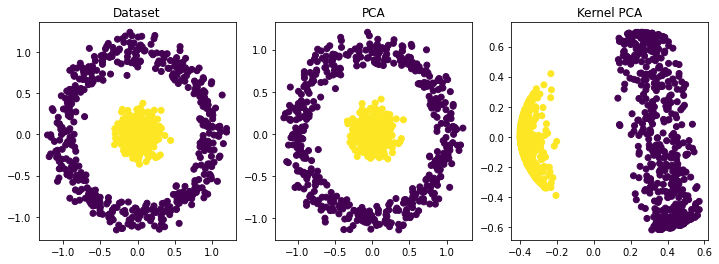


[Kernel PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

##Reducing Features by Maximizing Class Separability
**Problem**

You want to reduce the features to be used by a classifier.

**Solution**

Try `linear discriminant analysis (LDA)` to project the features onto component axes that maximize the separation of classes:


In [ ]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


We can use `explained_variance_ratio_` to view the amount of variance explained by each component. In our solution the single component explained over 99% of the variance:

In [ ]:
## View the ratio of explained variance
lda.explained_variance_ratio_

array([0.9912126])

###**Linear discriminant analysis (LDA)**


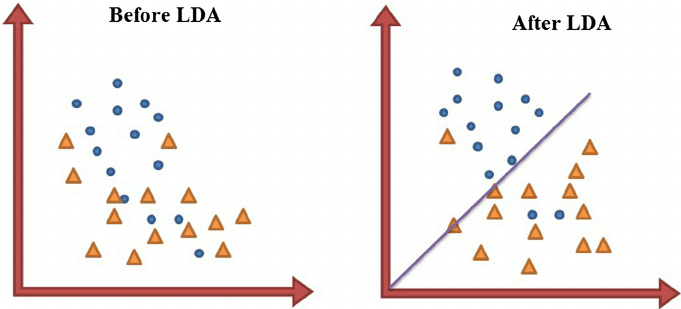

[Comparison of LDA and PCA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

[Learn LDA](https://sebastianraschka.com/Articles/2014_python_lda.html)

